In [92]:
# 1. Loading dataset and plotting graph

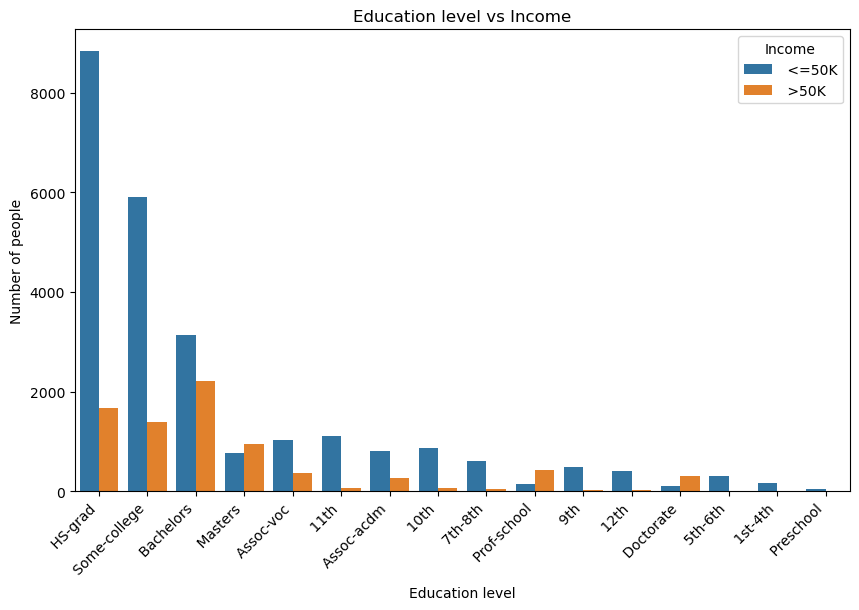

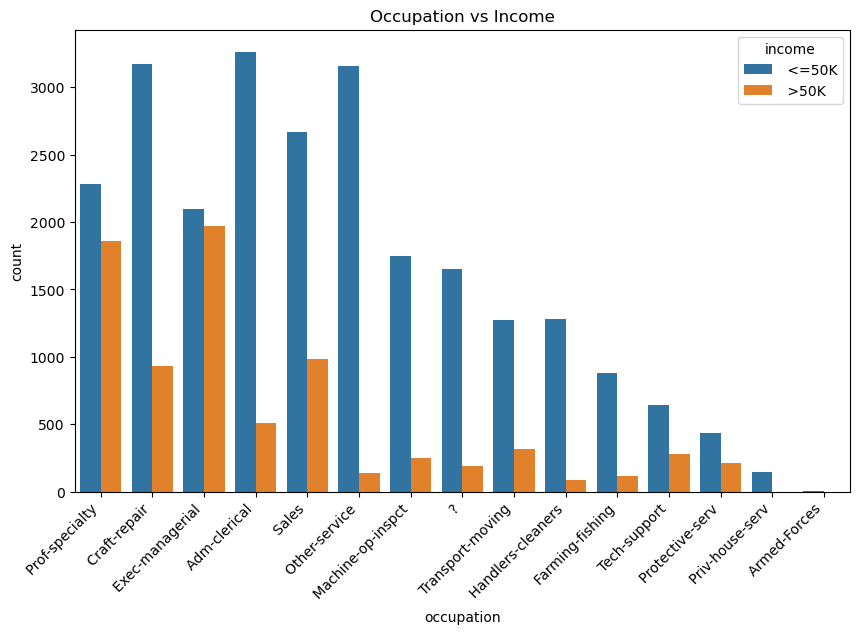

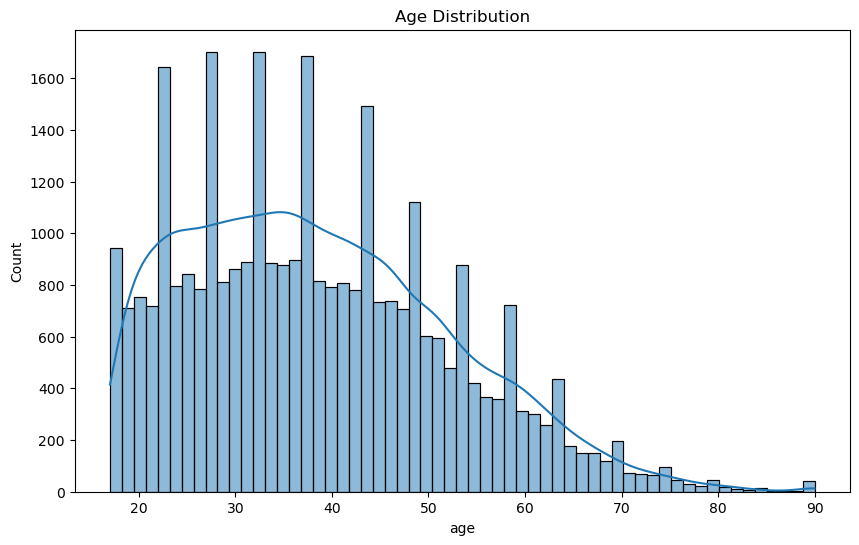

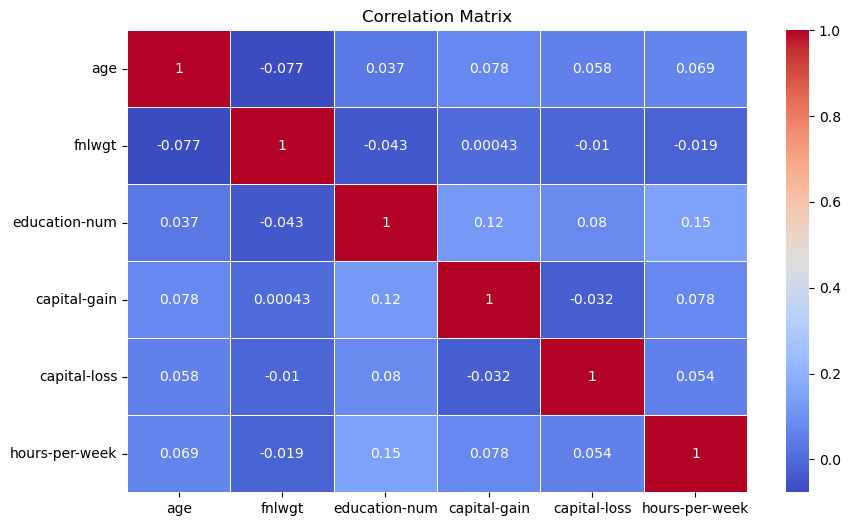

                age        fnlwgt  education-num  capital-gain  capital-loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours-per-week  
count    32561.000000  
mean        40.437456  
std         12.347429  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000  


In [27]:
#SD7502 Assignment 1
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

#Lodaing the dataset using pandas
df = pd.read_csv('C:/Users/parth/Documents/GitHub/SD7502-Assignment-1/Datasets/income_evaluation.csv')

#Cleaning the column names by removing leading whitespace
df.columns = df.columns.str.strip()

#Creating bar plot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='education', hue='income', order=df['education'].value_counts().index)
plt.title('Education level vs Income')
plt.xlabel('Education level')
plt.ylabel('Number of people')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Income')
plt.show()

#A second bar plot to compare occupation vs income
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='occupation', hue='income', order=df['occupation'].value_counts().index)
plt.title('Occupation vs Income')
plt.xticks(rotation=45, ha='right')
plt.show()

#Creating histogram plot for further analysis
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], kde=True)
plt.title('Age Distribution')
plt.show()

#Selecting numerical values only for colleration matrix
numerical_df = df.select_dtypes(include=['int64', 'float64'])

#Creating colleration matrix for further analysis
plt.figure(figsize=(10, 6))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

#Providing a description of the dataset
print(df.describe())

In [19]:
# 2. Creating and Training Models

In [63]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report

#Defining the target and features
X = df.drop('income', axis=1)
y = df['income'].apply(lambda x: 1 if x == ' >50K' else 0)

#Identifying the categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

#Defining preprocessing for numerical columns (scaling)
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

#Defining preprocessing for categorical columns (encoding)
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

#Combining preprocessing data
preprocessor = ColumnTransformer(
    transformers = [
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

#Apply the preprocessing pipeline to the dataset
X_preprocessed = preprocessor.fit_transform(X)

#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42, stratify=y)

print(df['income'].unique())
print(y.value_counts())

[' <=50K' ' >50K']
income
0    24720
1     7841
Name: count, dtype: int64


In [74]:
#Creating and testing Logistic Regression Model
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_logistic))

#Creating and testing Support Vector Machine (SVM) Model
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      4945
           1       0.74      0.62      0.67      1568

    accuracy                           0.86      6513
   macro avg       0.81      0.78      0.79      6513
weighted avg       0.85      0.86      0.85      6513

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      4945
           1       0.77      0.60      0.67      1568

    accuracy                           0.86      6513
   macro avg       0.82      0.77      0.79      6513
weighted avg       0.85      0.86      0.85      6513



In [73]:
#Creating and training Random Forest Model
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train, y_train)
y_pred_rf = random_forest_model.predict(X_test)
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

#Creating and testing Gradient Boosting Model 
gradient_boosting_model = GradientBoostingClassifier(random_state=42)
gradient_boosting_model.fit(X_train, y_train)
y_pred_gb = gradient_boosting_model.predict(X_test)
print("Gradient Boosting Classification Report:")
print(classification_report(y_test, y_pred_gb))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      4945
           1       0.74      0.64      0.68      1568

    accuracy                           0.86      6513
   macro avg       0.81      0.78      0.80      6513
weighted avg       0.85      0.86      0.85      6513

Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      4945
           1       0.79      0.62      0.70      1568

    accuracy                           0.87      6513
   macro avg       0.84      0.79      0.81      6513
weighted avg       0.86      0.87      0.86      6513

